In [101]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\Kaggle Competetion\Kaggle Titanic Passenger Death Prediction\train.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [103]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
map_value = {
    3 : "3rd Class",
    2 : "2nd Class",
    1 : "1st Class"
}

df["Pclass"] = df["Pclass"].replace(map_value)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3rd Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3rd Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3rd Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
df_n = pd.DataFrame()

df_n["mean_fare"] = df.groupby("Pclass")["Fare"].mean()


In [106]:
df_n

,mean_fare
Pclass,
1st Class,84.154687
2nd Class,20.662183
3rd Class,13.675550


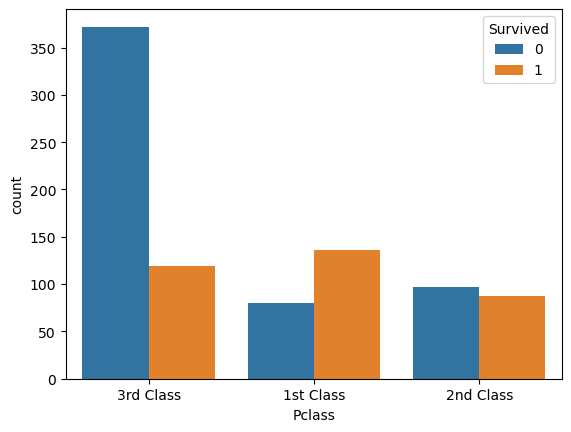

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Pclass", hue="Survived")
plt.show()

In [108]:
pd.crosstab(df["Pclass"], df["Survived"]).apply(lambda x: round((x/x.sum())*100, 2).astype(str) + "%", axis=1)

Survived,0,1
Pclass,,
1st Class,37.04%,62.96%
2nd Class,52.72%,47.28%
3rd Class,75.76%,24.24%


In [109]:
pd.crosstab(df["Pclass"], df["Sex"]).apply(lambda x: round((x/x.sum())*100, 2).astype(str)+"%", axis=1)

Sex,female,male
Pclass,,
1st Class,43.52%,56.48%
2nd Class,41.3%,58.7%
3rd Class,29.33%,70.67%


In [110]:
pd.crosstab(df["Sex"], df["Survived"]).apply(lambda x: round((x/x.sum())*100, 2).astype(str) + "%", axis=1)

Survived,0,1
Sex,,
female,25.8%,74.2%
male,81.11%,18.89%


C:\Users\DELL\AppData\Local\Temp\ipykernel_15940\2846401488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="spearman"), cmap="YlGnBu", annot=True)


<Axes: >

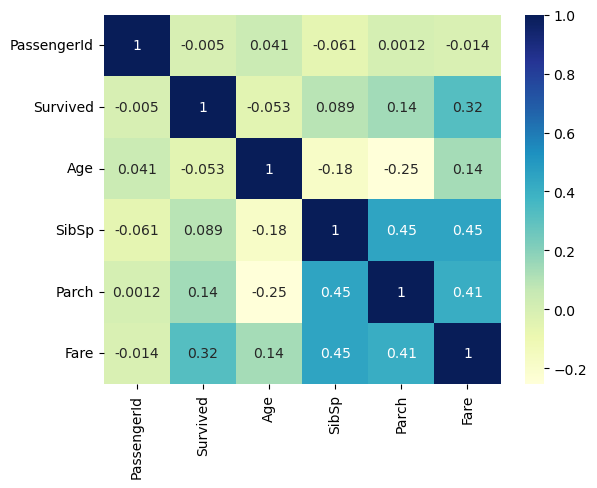

In [111]:
sns.heatmap(df.corr(method="spearman"), cmap="YlGnBu", annot=True)

<Axes: >

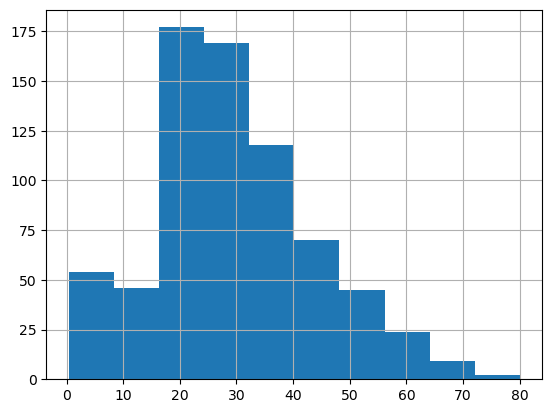

In [112]:
df["Age"].hist()

In [113]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [114]:
import numpy as np

conditions = [
    (df["Age"] <=15),
    (df["Age"] > 15) & (df["Age"] <=40),
    (df["Age"] > 40) & (df["Age"] <=60),
    (df["Age"] > 60)
]

values = ["Child", "Adult", "Old", "Very Old"]

df["Age"] = np.select(conditions, values, default="Unknown")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3rd Class,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3rd Class,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,0,3rd Class,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S


In [115]:
pd.crosstab(df["Age"], df["Survived"]).apply(lambda x: round((x/x.sum())*100, 2).astype(str) + "%", axis=1)

Survived,0,1
Age,,
Adult,63.83%,36.17%
Child,40.96%,59.04%
Old,60.94%,39.06%
Very Old,77.27%,22.73%


In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3rd Class,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3rd Class,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,0,3rd Class,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S


In [117]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [118]:
pd.crosstab(df["SibSp"], df["Survived"]).apply(lambda x: round((x/x.sum())*100, 2).astype(str) + "%", axis=1)

Survived,0,1
SibSp,,
0,65.46%,34.54%
1,46.41%,53.59%
2,53.57%,46.43%
3,75.0%,25.0%
4,83.33%,16.67%
5,100.0%,0.0%
8,100.0%,0.0%


In [119]:
pd.crosstab(df["Parch"], df["Survived"]).apply(lambda x: round((x/x.sum())*100, 2).astype(str) + "%", axis=1)

Survived,0,1
Parch,,
0,65.63%,34.37%
1,44.92%,55.08%
2,50.0%,50.0%
3,40.0%,60.0%
4,100.0%,0.0%
5,80.0%,20.0%
6,100.0%,0.0%


In [120]:
df["Family members"] = df["SibSp"] + df["Parch"]

In [121]:
df = df.drop("SibSp", axis=1)
df = df.drop("Parch", axis=1)

In [122]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family members
0,1,0,3rd Class,"Braund, Mr. Owen Harris",male,Adult,A/5 21171,7.2500,NaN,S,1
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,PC 17599,71.2833,C85,C,1
2,3,1,3rd Class,"Heikkinen, Miss. Laina",female,Adult,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,113803,53.1000,C123,S,1
4,5,0,3rd Class,"Allen, Mr. William Henry",male,Adult,373450,8.0500,NaN,S,0


In [123]:
pd.crosstab(df["Family members"], df["Survived"]).apply(lambda x: round((x/x.sum())*100, 2).astype(str) + "%", axis=1)

Survived,0,1
Family members,,
0,69.65%,30.35%
1,44.72%,55.28%
2,42.16%,57.84%
3,27.59%,72.41%
4,80.0%,20.0%
5,86.36%,13.64%
6,66.67%,33.33%
7,100.0%,0.0%
10,100.0%,0.0%


In [125]:
map_values = {
    0 : "Alone",
    1 : "Small Family",
    2 : "Medium Family",
    3 : "Big Family",
    4 : "Extra Big Family",
    5 : "Extra Big Family",
    6 : "Alone",
    7 : "Extra Big Family",
    8 : "Extra Big Family",
    9 : "Extra Big Family",
    10 : "Extra Big Family"
}

df["Family members"] = df["Family members"].replace(map_values)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family members
0,1,0,3rd Class,"Braund, Mr. Owen Harris",male,Adult,A/5 21171,7.2500,NaN,S,Small Family
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,PC 17599,71.2833,C85,C,Small Family
2,3,1,3rd Class,"Heikkinen, Miss. Laina",female,Adult,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,113803,53.1000,C123,S,Small Family
4,5,0,3rd Class,"Allen, Mr. William Henry",male,Adult,373450,8.0500,NaN,S,Alone


In [126]:
df.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Family members      0
dtype: int64

In [127]:
df = df.drop("Cabin", axis=1)
df = df.drop("Ticket", axis=1)
df = df.drop("PassengerId", axis=1)
df = df.drop("Name", axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family members
0,0,3rd Class,male,Adult,7.2500,S,Small Family
1,1,1st Class,female,Adult,71.2833,C,Small Family
2,1,3rd Class,female,Adult,7.9250,S,Alone
3,1,1st Class,female,Adult,53.1000,S,Small Family
4,0,3rd Class,male,Adult,8.0500,S,Alone


In [128]:
mean_value = df.groupby("Pclass")["Fare"].mean()

mean_value

Pclass
1st Class    84.154687
2nd Class    20.662183
3rd Class    13.675550
Name: Fare, dtype: float64

In [129]:
df["Fare"] = df.apply(lambda x: "High" if x["Pclass"] == "1st Class" else ("Medium" if x["Pclass"] == "2nd Class" else "Low"), axis=1)


In [130]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family members
0,0,3rd Class,male,Adult,Low,S,Small Family
1,1,1st Class,female,Adult,High,C,Small Family
2,1,3rd Class,female,Adult,Low,S,Alone
3,1,1st Class,female,Adult,High,S,Small Family
4,0,3rd Class,male,Adult,Low,S,Alone


sns.heatmap(df.corr(method="spearman"), cmap="YlGnBu", annot=True)

In [131]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [132]:
def update_cols(df):
    cat_cols = []
    num_cols = []
    
    for column in df.columns:
        if df[column].dtypes == object:
            cat_cols.append(column)
        else:
            num_cols.append(column)
    return cat_cols, num_cols

In [133]:
cat_cols, num_cols = update_cols(df)

In [134]:
dummies = pd.get_dummies(df[cat_cols])
X_train = pd.concat([dummies, df[num_cols]], axis=1)
X_train = X_train.sort_index(axis=1)
y_train = X_train["Survived"]
X_train = X_train.drop("Survived", axis=1)
X_train.head()

,Age_Adult,Age_Child,Age_Old,Age_Very Old,Embarked_C,Embarked_Q,Embarked_S,Family members_Alone,Family members_Big Family,Family members_Extra Big Family,Family members_Medium Family,Family members_Small Family,Fare_High,Fare_Low,Fare_Medium,Pclass_1st Class,Pclass_2nd Class,Pclass_3rd Class,Sex_female,Sex_male
0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0
3,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1


In [135]:
y_train.dtypes

dtype('int64')

# Do the same Preprocessing steps for test data

In [136]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\Kaggle Competetion\Kaggle Titanic Passenger Death Prediction\test.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
df.shape

(418, 11)

In [138]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [139]:
map_value = {
    3 : "3rd Class",
    2 : "2nd Class",
    1 : "1st Class"
}

df["Pclass"] = df["Pclass"].replace(map_value)

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3rd Class,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3rd Class,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2nd Class,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3rd Class,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3rd Class,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
import numpy as np

conditions = [
    (df["Age"] <=15),
    (df["Age"] > 15) & (df["Age"] <=40),
    (df["Age"] > 40) & (df["Age"] <=60),
    (df["Age"] > 60)
]

values = ["Child", "Adult", "Old", "Very Old"]

df["Age"] = np.select(conditions, values, default="Unknown")

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3rd Class,"Kelly, Mr. James",male,Adult,0,0,330911,7.8292,NaN,Q
1,893,3rd Class,"Wilkes, Mrs. James (Ellen Needs)",female,Old,1,0,363272,7.0000,NaN,S
2,894,2nd Class,"Myles, Mr. Thomas Francis",male,Very Old,0,0,240276,9.6875,NaN,Q
3,895,3rd Class,"Wirz, Mr. Albert",male,Adult,0,0,315154,8.6625,NaN,S
4,896,3rd Class,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Adult,1,1,3101298,12.2875,NaN,S


In [141]:
df["Family members"] = df["SibSp"] + df["Parch"]

In [142]:
df = df.drop("SibSp", axis=1)
df = df.drop("Parch", axis=1)

In [143]:
map_values = {
    0 : "Alone",
    1 : "Small Family",
    2 : "Medium Family",
    3 : "Big Family",
    4 : "Extra Big Family",
    5 : "Extra Big Family",
    6 : "Alone",
    7 : "Extra Big Family",
    8 : "Extra Big Family",
    9 : "Extra Big Family",
    10 : "Extra Big Family"
}

df["Family members"] = df["Family members"].replace(map_values)
df.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family members
0,892,3rd Class,"Kelly, Mr. James",male,Adult,330911,7.8292,NaN,Q,Alone
1,893,3rd Class,"Wilkes, Mrs. James (Ellen Needs)",female,Old,363272,7.0000,NaN,S,Small Family
2,894,2nd Class,"Myles, Mr. Thomas Francis",male,Very Old,240276,9.6875,NaN,Q,Alone
3,895,3rd Class,"Wirz, Mr. Albert",male,Adult,315154,8.6625,NaN,S,Alone
4,896,3rd Class,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Adult,3101298,12.2875,NaN,S,Medium Family


In [144]:
df = df.drop("Cabin", axis=1)
df = df.drop("Ticket", axis=1)
df = df.drop("PassengerId", axis=1)
df = df.drop("Name", axis=1)
df.head()

,Pclass,Sex,Age,Fare,Embarked,Family members
0,3rd Class,male,Adult,7.8292,Q,Alone
1,3rd Class,female,Old,7.0000,S,Small Family
2,2nd Class,male,Very Old,9.6875,Q,Alone
3,3rd Class,male,Adult,8.6625,S,Alone
4,3rd Class,female,Adult,12.2875,S,Medium Family


In [145]:
df["Fare"] = df.apply(lambda x: "High" if x["Pclass"] == "1st Class" else ("Medium" if x["Pclass"] == "2nd Class" else "Low"), axis=1)


In [146]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [147]:
cat_cols, num_cols = update_cols(df)

In [148]:
dummies = pd.get_dummies(df[cat_cols])
X_test = pd.concat([dummies, df[num_cols]], axis=1)
X_test = X_test.sort_index(axis=1)
X_test.head()

,Age_Adult,Age_Child,Age_Old,Age_Very Old,Embarked_C,Embarked_Q,Embarked_S,Family members_Alone,Family members_Big Family,Family members_Extra Big Family,Family members_Medium Family,Family members_Small Family,Fare_High,Fare_Low,Fare_Medium,Pclass_1st Class,Pclass_2nd Class,Pclass_3rd Class,Sex_female,Sex_male
0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1
3,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1
4,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0


In [149]:
X_train.shape, X_test.shape, y_train.shape

((891, 20), (418, 20), (891,))

In [150]:
y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}


xgb_model = XGBClassifier()


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(best_params)

after changing the fare to string

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 12, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]  # You can adjust the random_state if needed
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(best_params)


after 

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}

'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 8, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(best_params)


after

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}

'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


nb_model = GaussianNB()


nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)



from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Hyperparameters:", best_params)



after

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [10, 15, 20],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.08, 0.1, 'scale'],
}

svc_model = SVC()

grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(best_params)


after

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}

{'C': 10, 'gamma': 0.08, 'kernel': 'rbf'}

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


base_model = DecisionTreeClassifier(
    criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42
)


adaboost_model = AdaBoostClassifier(estimator=base_model)


param_grid = {
    'n_estimators': [30, 35, 40, 45],
    'learning_rate': [0.0005, 0.0008, 0.001]
}


grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=3)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Hyperparameters:", best_params)



after

Best Hyperparameters: {'learning_rate': 0.0005, 'n_estimators': 40}

Best Hyperparameters: {'learning_rate': 0.0005, 'n_estimators': 40}

In [181]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier



xgb_classifier = XGBClassifier(learning_rate=0.01, n_estimators=40, max_depth = 3, min_child_weight = 1, subsample = 1, colsample_bytree = 0.8)
rf_classifier = RandomForestClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=1, min_samples_split=2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform')
svc_classifier = SVC(C=10, gamma=0.1, kernel='poly', probability=True)
adaboost_classifier = AdaBoostClassifier(learning_rate=0.0005, n_estimators=40)

estimators = [
    ('xgb', xgb_classifier),
    ('rf', rf_classifier),
    ('dt', dt_classifier),
    ('knn', knn_classifier),
    ('svc', svc_classifier),
    ('adaboost', adaboost_classifier)
]

voting_classifier = VotingClassifier(estimators=estimators, voting='hard')


voting_classifier.fit(X_train, y_train)


y_pred = voting_classifier.predict(X_test)



In [182]:
sample_submission = pd.DataFrame(columns=["PassengerId", "Survived"])

num = len(y_pred)

sample_submission["PassengerId"] = np.linspace(892, 892+num-1, num=num, dtype=int)

sample_submission["Survived"] = y_pred

sample_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [183]:
sample_submission.shape

(418, 2)

In [184]:
sample_submission.to_csv("Sample_submission_engtt_fteng_hard.csv", index=False)